In [179]:
import os
import json 

res = []
for fn in os.listdir("openml-cc18-res"):
  if ".json" not in fn:
    continue
  with open(f"openml-cc18-res/{fn}", "r") as f:
    res.append(json.loads(f.read()))

In [180]:
from scipy.stats import wilcoxon

a, b = [], []

for r in res:
  if r['metric'] == "roc_auc":
    a += r['fasttext']
    b += r['fasttext_100']
  
wilcoxon(a, b)

WilcoxonResult(statistic=5065.5, pvalue=0.001286307615118802)

In [181]:
print("Number of datasets failed:", len([r['data_id'] for r in res if "name" not in r]))

fill_res = []
for r in res:
  if "name" not in r or "fasttext" not in r:
    continue
  else:
    fill_res.append(r)

print(len(fill_res))

Number of datasets failed: 0
72


In [182]:
fill_res

[{'data_id': 4538,
  'name': 'GesturePhaseSegmentationProcessed',
  'metric': 'neg_log_loss',
  'fasttext': [-1.5203659199372308,
   -1.5203659199372308,
   -1.6789174068998738,
   -1.592344612092433,
   -1.5922916260570095],
  'fasttext_100': [-2.2941817791066126,
   -2.3520711305356206,
   -2.4507802394602405,
   -2.3725452136858274,
   -1.5203659199372308]},
 {'data_id': 307,
  'name': 'vowel',
  'metric': 'neg_log_loss',
  'fasttext': [-2.397906543111057,
   -2.3978925549724477,
   -2.397881761689275,
   -2.397886397813454,
   -2.3978804608865962],
  'fasttext_100': [-4.396321840809803,
   -4.249517037824112,
   -4.386831871554618,
   -4.533940418916441,
   -4.5473227024292235]},
 {'data_id': 46,
  'name': 'splice',
  'metric': 'neg_log_loss',
  'fasttext': [-0.92037388972647,
   -1.002946139907743,
   -1.0253081881385249,
   -1.032675924645303,
   -0.9613814561706369],
  'fasttext_100': [-0.9438182485381341,
   -1.0173830644698667,
   -1.206777810811971,
   -0.9658443912666267,
  

In [183]:
import numpy as np

def format_scores(r_dict, clf_name):
  r_dict[f"{clf_name}_score_mean"] = np.mean(r_dict[clf_name])
  r_dict[f"{clf_name}_score_std"] = np.std(r_dict[clf_name])
  del r_dict[clf_name]

for r_dict in fill_res:
  format_scores(r_dict, "fasttext")
  format_scores(r_dict, "fasttext_100")

In [184]:
sorted([r['data_id'] for r in  fill_res])

[3,
 6,
 11,
 12,
 14,
 15,
 16,
 18,
 22,
 23,
 28,
 29,
 31,
 32,
 37,
 38,
 44,
 46,
 50,
 54,
 151,
 182,
 188,
 300,
 307,
 458,
 469,
 554,
 1049,
 1050,
 1053,
 1063,
 1067,
 1068,
 1461,
 1462,
 1464,
 1468,
 1475,
 1478,
 1480,
 1485,
 1486,
 1487,
 1489,
 1494,
 1497,
 1501,
 1510,
 1590,
 4134,
 4534,
 4538,
 6332,
 23381,
 23517,
 40499,
 40668,
 40670,
 40701,
 40923,
 40927,
 40966,
 40975,
 40978,
 40979,
 40982,
 40983,
 40984,
 40994,
 40996,
 41027]

In [185]:
import pandas as pd

df = pd.DataFrame.from_dict(fill_res)
df = df.round(3)
df = df.dropna()
df = df.sort_values("data_id")
for k, grouped_res in df.groupby("metric"):
  print(k)
  for i, r in grouped_res.iterrows():
    d_id = r['data_id']
    ds_name = r['name'].capitalize().replace('_', ' ')
    ft_mean = abs(r['fasttext_score_mean'])
    ft_std = r['fasttext_score_std']
    ft_pt_mean = abs(r['fasttext_100_score_mean'])
    ft_pt_std = r['fasttext_100_score_std']
    
    if k == "neg_log_loss":
      if ft_mean == ft_pt_mean:
        pass
      elif ft_mean > ft_pt_mean:
        ft_pt_mean = f"\\textbf{{{ft_pt_mean}}}"
      else:
        ft_mean = f"\\textbf{{{ft_mean}}}"
    else:
      if ft_mean == ft_pt_mean:
        pass
      elif ft_mean < ft_pt_mean:
        ft_pt_mean = f"\\textbf{{{ft_pt_mean}}}"
      else:
        ft_mean = f"\\textbf{{{ft_mean}}}"

    print(f"{d_id} & {ds_name} & {ft_mean} $\\pm$ {ft_std} & {ft_pt_mean} $\\pm$ {ft_pt_std} \\\\")

neg_log_loss
6 & Letter & \textbf{3.724} $\pm$ 0.381 & 4.133 $\pm$ 0.02 \\
11 & Balance-scale & 0.934 $\pm$ 0.008 & \textbf{0.925} $\pm$ 0.011 \\
12 & Mfeat-factors & 2.302 $\pm$ 0.0 & \textbf{1.934} $\pm$ 0.452 \\
14 & Mfeat-fourier & \textbf{2.303} $\pm$ 0.0 & 4.03 $\pm$ 2.116 \\
16 & Mfeat-karhunen & \textbf{2.303} $\pm$ 0.0 & 8.342 $\pm$ 0.881 \\
18 & Mfeat-morphological & \textbf{1.517} $\pm$ 0.214 & 2.242 $\pm$ 0.114 \\
22 & Mfeat-zernike & \textbf{2.303} $\pm$ 0.0 & 8.746 $\pm$ 0.662 \\
23 & Cmc & 1.058 $\pm$ 0.072 & \textbf{0.984} $\pm$ 0.014 \\
28 & Optdigits & \textbf{2.025} $\pm$ 0.139 & 2.042 $\pm$ 0.213 \\
32 & Pendigits & 1.863 $\pm$ 0.22 & \textbf{1.755} $\pm$ 0.274 \\
46 & Splice & \textbf{0.989} $\pm$ 0.042 & 1.07 $\pm$ 0.118 \\
54 & Vehicle & \textbf{1.386} $\pm$ 0.0 & 2.8 $\pm$ 0.158 \\
182 & Satimage & \textbf{0.759} $\pm$ 0.024 & 0.771 $\pm$ 0.477 \\
188 & Eucalyptus & \textbf{1.567} $\pm$ 0.017 & 2.237 $\pm$ 0.124 \\
300 & Isolet & \textbf{3.26} $\pm$ 0.003 & 3.29

In [199]:
from scipy.stats import wilcoxon

rank_ft, rank_ft100 = [], []
for _, x in df[df["metric"] == "neg_log_loss"].iterrows():
  if x['fasttext_score_mean'] < x['fasttext_100_score_mean']:
    rank_ft.append(1)
    rank_ft100.append(2)
  elif x['fasttext_score_mean'] > x['fasttext_100_score_mean']:
    rank_ft.append(2)
    rank_ft100.append(1)
  else:
    rank_ft.append(1.5)
    rank_ft100.append(1.5)
    

print(sum(rank_ft) / len(df[df["metric"] == "neg_log_loss"]), sum(rank_ft100) / len(df[df["metric"] == "neg_log_loss"]))
print(wilcoxon(rank_ft, rank_ft100))

rank_ft, rank_ft100 = [], []
for _, x in df[df["metric"] == "roc_auc"].iterrows():
  if x['fasttext_score_mean'] > x['fasttext_100_score_mean']:
    rank_ft.append(1)
    rank_ft100.append(2)
  elif x['fasttext_score_mean'] < x['fasttext_100_score_mean']:
    rank_ft.append(2)
    rank_ft100.append(1)
  else:
    rank_ft.append(1.5)
    rank_ft100.append(1.5)
    
print(sum(rank_ft) / len(df[df["metric"] == "roc_auc"]), sum(rank_ft100) / len(df[df["metric"] == "roc_auc"]))
print(wilcoxon(rank_ft, rank_ft100))

1.527027027027027 1.472972972972973
WilcoxonResult(statistic=314.5, pvalue=0.7388826803635273)
1.6285714285714286 1.3714285714285714
WilcoxonResult(statistic=204.0, pvalue=0.11718508719813801)


In [195]:
from scipy.stats import wilcoxon


wilcoxon(rank_ft, rank_ft100)

WilcoxonResult(statistic=204.0, pvalue=0.11718508719813801)

0.11799937131999672


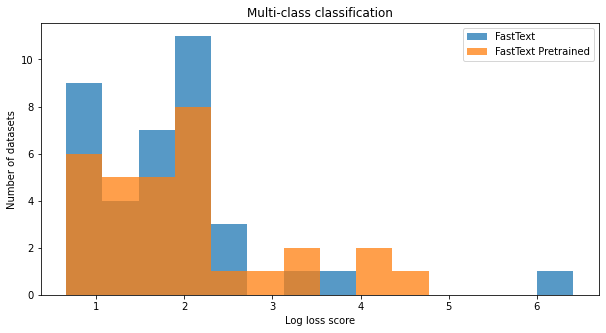

In [187]:
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import numpy as np

res = wilcoxon(np.abs(df[df["metric"] == "neg_log_loss"]["fasttext_score_mean"]), np.abs(df[df["metric"] == "neg_log_loss"]["fasttext_100_score_mean"])).pvalue
print(res)
plt.figure(figsize=(10, 5))
plt.ylabel("Number of datasets")
plt.xlabel("Log loss score")
_, bins, _ = plt.hist(np.abs(df[df["metric"] == "neg_log_loss"]["fasttext_score_mean"]), alpha=0.75, label="FastText", bins=14)
plt.hist(np.abs(df[df["metric"] == "neg_log_loss"]["fasttext_100_score_mean"]), alpha=0.75, label="FastText Pretrained", bins=bins)
plt.legend()
plt.title('Multi-class classification')
plt.show()

0.1097401463938845


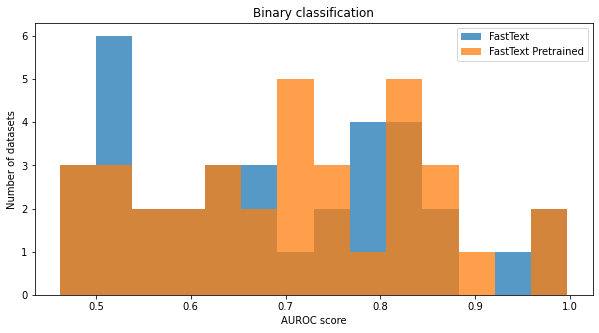

In [188]:
from scipy.stats import wilcoxon

res = wilcoxon(df[df["metric"] == "roc_auc"]["fasttext_score_mean"], df[df["metric"] == "roc_auc"]["fasttext_100_score_mean"]).pvalue
print(res)

plt.figure(figsize=(10, 5))
plt.ylabel("Number of datasets")
plt.xlabel("AUROC score")
_, bins, _ = plt.hist(df[df["metric"] == "roc_auc"]["fasttext_score_mean"], alpha=0.75, label="FastText", bins=14)
plt.hist(df[df["metric"] == "roc_auc"]["fasttext_100_score_mean"], alpha=0.75, label="FastText Pretrained", bins=bins)


plt.legend()
plt.title('Binary classification')
plt.show()